In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pytrends
from pytrends.request import TrendReq

In [3]:
dataset = pd.read_csv("FullDataset.csv")

In [4]:
#We should see New Zealand, United States, Canada, and Great Britain
dataset.Region.unique()

array(['nz', 'us', 'ca', 'gb'], dtype=object)

# Dataset Description

In [5]:
def get_top_brands(k,df):
    for i in range(df.shape[0]):
        row=df.loc[i]
        brands=row['Brands']
        brands=[brand.strip().strip('\'').strip('\"').strip() for brand in brands[1:-1].split(',')]
        for brand in brands:
            if brand not in count_dict:
                count_dict[brand]=0
            count_dict[brand]+=1
    
    keys=list(count_dict.keys())
    keys=sorted(keys,key=lambda x:count_dict[x],reverse=True)
    return [(key,count_dict[key]) for key in keys[:k]]

In [6]:
count_dict = {}
x = get_top_brands(20, dataset)

In [14]:
table = pd.DataFrame(x)
table.columns = ["Brand","Appearances"]
table

,Brand,Appearances
0,three,14380
1,gucci,9450
2,boss,5272
3,patek,2736
4,police,1769
5,versace,1381
6,muller,1360
7,sting,1347
8,joseph,1259
9,diesel,1175


In [21]:
table.drop([0,2,4,6,7,8,9,10],axis = 0)

,Brand,Appearances
1,gucci,9450
3,patek,2736
5,versace,1381
11,balenciaga,903
12,saint laurent,870
13,jag,758
14,rolex,753
15,louis vuitton,638
16,prada,621
17,phillipe,593


# Pulling Google Trends Data

In [ ]:
pytrends = TrendReq(hl = 'en-US', tz = 360)
kw_list = ['gucci','patek','versace','balenciaga','saint laurent']
main_frame = pd.DataFrame()
frame = pytrends.get_historical_interest([kw_list[0]], year_start=2017, 
                                         month_start=1, day_start=1, 
                                         year_end = 2018, month_end = 2, 
                                         day_end = 1, sleep = 1)

In [46]:
frame1 = pytrends.get_historical_interest([kw_list[1]], year_start=2017, month_start=1, day_start=1, year_end = 2018, month_end = 2, day_end = 1, sleep = 1)

In [47]:
frame2 = pytrends.get_historical_interest([kw_list[2]], year_start=2017, month_start=1, day_start=1, year_end = 2018, month_end = 2, day_end = 1, sleep = 1)

In [48]:
frame3 = pytrends.get_historical_interest([kw_list[3]], year_start=2017, month_start=1, day_start=1, year_end = 2018, month_end = 2, day_end = 1, sleep = 1)

In [49]:
frame4 = pytrends.get_historical_interest([kw_list[4]], year_start=2017, month_start=1, day_start=1, year_end = 2018, month_end = 2, day_end = 1, sleep = 1)

In [57]:
#What we want to do is merge all of these on one axis
frame = frame.drop(['isPartial'], axis = 1)
frame1 = frame1.drop(['isPartial'], axis = 1)
frame2 = frame2.drop(['isPartial'], axis = 1)
frame3 = frame3.drop(['isPartial'], axis = 1)
frame4 = frame4.drop(['isPartial'], axis = 1)

from functools import reduce
frames = [frame,frame1,frame2,frame3,frame4]
final_frames = reduce(lambda left, right: pd.merge(left, right, on = 'date'),frames)

In [62]:
day_brands = final_frames.groupby(final_frames.index.date).mean()

<Figure size 432x288 with 0 Axes>

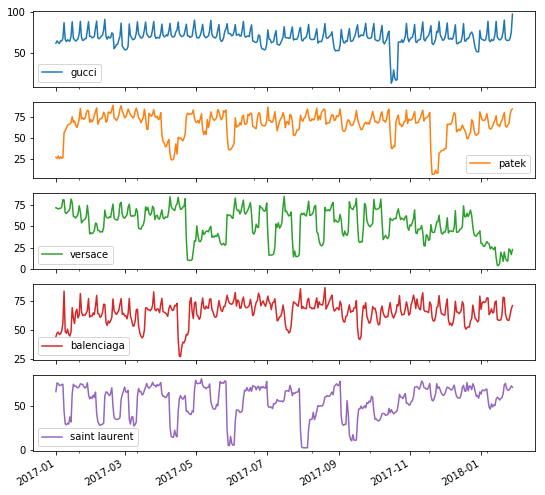

In [72]:
plt.figure(); day_brands.plot(subplots = True, figsize = (9,9)); plt.legend(loc = 'best')
plt.savefig('Google_Trends_Pre.png')

In [74]:
day_brands.to_csv('DailyGoogleTrends.csv')

In [79]:
#Getting Daily Returns (Change from previous day avg)
log_ret_brands = pd.DataFrame(index = day_brands.index)
for col in day_brands:
    log_ret_brands[col] = np.log(day_brands[col]/day_brands[col].shift(1))
log_ret_brands.drop(log_ret_brands.index[0],inplace = True)

<Figure size 432x288 with 0 Axes>

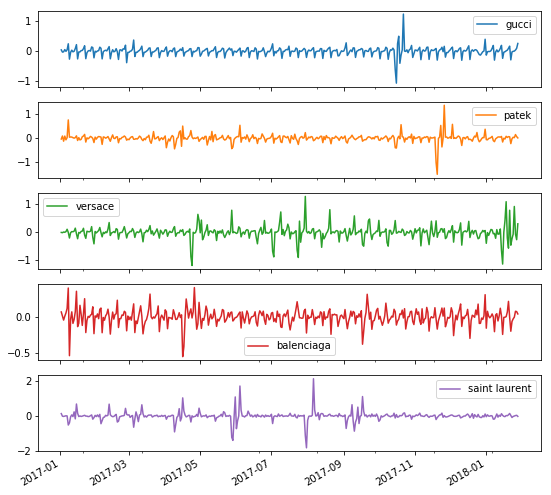

In [82]:
plt.figure(); log_ret_brands.plot(subplots = True, figsize = (9,9)); plt.legend(loc = 'best')
plt.savefig('LoggedGoogleTrends.png')

In [91]:
#Cutting down to size
print(log_ret_brands.index[-1])
log_ret_brands.drop(log_ret_brands.tail(19).index,inplace = True)
print(log_ret_brands.index[-1])

2018-01-28


In [93]:
log_ret_brands.to_csv("LoggedGoogleTrends.csv")

# Creating Independent Dataset

In [ ]:
df = pd.read_csv("LoggedGoogleTrends.csv")
df = df.set_index('Unnamed: 0')
df.index.names = ['Date']

In [ ]:
#These are the brands to do analysis on from the Dataset
print(kw_list)

In [ ]:
print(dataset.Position.unique().min())
print(dataset.Position.unique().max())

In [ ]:
#Importing Dataset
dataset = pd.read_csv("FullDataset.csv")
dataset.Region.unique()

In [ ]:
dataset.drop(['Unnamed: 0','index', 'Track Name', 'Artist','URL'], axis = 1, inplace = True)

In [ ]:
dataset.head()

In [298]:
print(dataset.shape)
dataset.head(600)

(41217, 6)


,Position,Streams,Date,Region,Brands,Label
0,17,18793,2017-01-01,nz,['gucci'],0
1,19,17618,2017-01-01,nz,['three'],1
2,46,10268,2017-01-01,nz,"['gucci', 'muller']",0
3,73,6496,2017-01-01,nz,['boss'],5
4,74,6493,2017-01-01,nz,['three'],5
5,83,5745,2017-01-01,nz,['versace'],0
6,99,5213,2017-01-01,nz,['police'],1
7,101,5039,2017-01-01,nz,['three'],5
8,105,4901,2017-01-01,nz,['joseph'],1
9,112,4608,2017-01-01,nz,['gucci'],0


In [ ]:
date_dict = {'gucci':{},'patek':{},'versace':{},'balenciaga':{},'saint laurent':{}}
def get_independent_dict(df):
    for i in range(df.shape[0]):
        row = df.loc[i]
        date = row['Date']
        brands = row['Brands']
        streams = row['Streams']
        label = row['Label']
        pos = row['Position']
        brands=[brand.strip().strip('\'').strip('\"').strip() for brand in brands[1:-1].split(',')]
        for brand in brands:
            if brand in date_dict.keys():
                if date in date_dict[brand].keys():
                    date_dict[brand][date].append((pos, streams, label))
                else:
                    date_dict[brand][date] = [(pos, streams, label)]


In [ ]:
get_independent_dict(dataset)

In [ ]:
#Create Dataframe for Gucci
gucci = pd.DataFrame(index = df.index)

In [302]:
date_dict

{'gucci': {'2017-01-01': [(17, 18793, 0),
   (46, 10268, 0),
   (112, 4608, 0),
   (1, 1371493, 0),
   (5, 874289, 0),
   (162, 163667, 0),
   (178, 151474, 0),
   (187, 146863, 0),
   (4, 100524, 0),
   (6, 90233, 0),
   (10, 159432, 0),
   (57, 58416, 0),
   (194, 25525, 0)],
  '2017-01-02': [(17, 19880, 0),
   (39, 12194, 0),
   (106, 5133, 0),
   (1, 1161746, 0),
   (5, 733662, 0),
   (107, 184948, 0),
   (155, 144566, 0),
   (178, 134102, 0),
   (4, 90884, 0),
   (7, 74171, 0),
   (132, 17553, 0),
   (154, 15891, 0),
   (158, 15697, 0),
   (11, 185070, 0),
   (59, 68456, 0),
   (153, 31906, 0)],
  '2017-01-03': [(18, 20110, 0),
   (36, 13914, 0),
   (108, 5269, 0),
   (1, 1284891, 0),
   (5, 769249, 0),
   (97, 224384, 0),
   (147, 169065, 0),
   (170, 155273, 0),
   (4, 99854, 0),
   (9, 78082, 0),
   (126, 19982, 0),
   (154, 17304, 0),
   (156, 17163, 0),
   (14, 192747, 0),
   (55, 74983, 0),
   (141, 36356, 0)],
  '2017-01-04': [(19, 20791, 0),
   (36, 15395, 0),
   (100, 598

In [ ]:
#Loop through and sum
#Extract days top rank
#Extract Total Streams with song mention
#Extract Most popular categorical value
#Done by creating sub dict

def make_ind_dict(name):
    temp_dict = {}
    for date in date_dict[name].keys():
        total_streams = 0
        top_rank = 201
        mentions = date_dict[name][date]
        category_dict = {}
        for tup in mentions:
            if tup[0] < top_rank:
                top_rank = tup[0]
            total_streams += tup[1]
            if tup[2] in category_dict.keys():
                category_dict[tup[2]] += tup[1]
            else:
                category_dict[tup[2]] = tup[1]
        temp_max = -1
        top_cat = -1
        for key in category_dict.keys():
            if category_dict[key] > temp_max:
                temp_max = category_dict[key]
                top_cat = key
        temp_dict[date] = [total_streams,top_rank,top_cat]
    return temp_dict

In [304]:
gucci_dict = make_ind_dict('gucci')
patek_dict = make_ind_dict('patek')
versace_dict = make_ind_dict('versace')
balenciaga_dict = make_ind_dict('balenciaga')
saintLaurent_dict = make_ind_dict('saint laurent')

In [305]:
dict_lst = [gucci_dict, patek_dict, versace_dict, balenciaga_dict, saintLaurent_dict]
for i in dict_lst:
    print(len(i))

371
370
370
324
267


In [307]:
#Import Branded Songs
branded_songs = pd.read_csv('DataSet_hope.csv')
branded_songs.head()
sum_dict = {}
for i in range(branded_songs.shape[0]):
    row = branded_songs.loc[i]
    if row['Date'] in sum_dict:
        sum_dict[row['Date']] += row['Streams']
    else:
        sum_dict[row['Date']] = row['Streams']

{'2017-01-01': 74988596,
 '2017-01-02': 69534420,
 '2017-01-03': 77548767,
 '2017-01-04': 79042111,
 '2017-01-05': 79488664,
 '2017-01-06': 86735315,
 '2017-01-07': 81394647,
 '2017-01-08': 76292311,
 '2017-01-09': 83250179,
 '2017-01-10': 85336606,
 '2017-01-11': 87287827,
 '2017-01-12': 88168119,
 '2017-01-13': 93633147,
 '2017-01-14': 89165389,
 '2017-01-15': 81217491,
 '2017-01-16': 85867895,
 '2017-01-17': 87934211,
 '2017-01-18': 88955617,
 '2017-01-19': 89003983,
 '2017-01-20': 90964719,
 '2017-01-21': 87402952,
 '2017-01-22': 79003219,
 '2017-01-23': 83681821,
 '2017-01-24': 86741403,
 '2017-01-25': 87869658,
 '2017-01-26': 89116262,
 '2017-01-27': 97155075,
 '2017-01-28': 92305864,
 '2017-01-29': 82042782,
 '2017-01-30': 87230937,
 '2017-01-31': 90112191,
 '2017-02-01': 90994436,
 '2017-02-02': 91145605,
 '2017-02-03': 99813946,
 '2017-02-04': 96331286,
 '2017-02-05': 87302434,
 '2017-02-06': 85111423,
 '2017-02-07': 91372112,
 '2017-02-08': 92411133,
 '2017-02-09': 91579234,


In [321]:
tot_streams = pd.DataFrame.from_dict(sum_dict, orient = 'index')
tot_streams.columns = ['SpotifyStreams']
tot_streams.index = pd.DatetimeIndex(tot_streams.index)
tot_streams.index.name = 'Date'
tot_streams.sort_values(by = ['Date'])
idx = pd.date_range('2017-01-01', '2018-01-09')
tot_streams = tot_streams.reindex(idx)

In [336]:
idx = pd.date_range('2017-01-01', '2018-01-09')

def make_final_df(brand_dict):
    brand_df = pd.DataFrame(columns = ['Tot_Streams','Best_Rank','Top_Category'])
    for key in brand_dict.keys():
        brand_df.loc[key] = brand_dict[key]
    brand_df.index = pd.DatetimeIndex(brand_df.index)
    brand_df.index.name = 'Date'
    brand_df.sort_values(by = ['Date'])
    brand_df = brand_df.reindex(idx)
    brand_df['%Stream'] = brand_df['Tot_Streams']/tot_streams['SpotifyStreams']
    return brand_df
    
gucci_df = make_final_df(gucci_dict).dropna()
patek_df = make_final_df(patek_dict).dropna()
versace_df = make_final_df(versace_dict).dropna()
belanciaga_df = make_final_df(balenciaga_dict).dropna()
saintLaurent_df = make_final_df(saintLaurent_dict).dropna()

In [362]:
#Create a new column in order to capture song ("Momentum")
#positive 1 for higher rank, -1 for lower
#Then, do an everage 5 day momentum check
dataframes = [gucci_df, patek_df, versace_df, belanciaga_df, saintLaurent_df]
n = 5
for df in dataframes:
    best_rank = df['Best_Rank'].values
    best_rank_moment = np.zeros(df.shape[0])
    for i in range(1,df.shape[0]):
        if best_rank[i] < best_rank[i-1]:
            best_rank_moment[i] = 1
        elif best_rank[i] > best_rank[i-1]:
            best_rank_moment[i] = -1
        else:
            best_rank_moment[i] = 0
    best_rank_moment_five = np.zeros(df.shape[0])
    for j in range(n, df.shape[0] - n):
        best_rank_moment_five[j-1] = np.average(best_rank_moment[j-n:j])
    df['Best_Rank_Moment'] = best_rank_moment
    df['Best_Rank_Moment_5_Day'] = best_rank_moment_five

In [364]:
#Ready for Export
gucci_df.to_csv('GucciData.csv')
patek_df.to_csv('PatekData.csv')
versace_df.to_csv('VersaceData.csv')
belanciaga_df.to_csv('BelanciagaData.csv')
saintLaurent_df.to_csv('SaintLaurentData.csv')

In [48]:
gucci_corr = pd.read_csv('GucciData.csv')
gucci_log = pd.read_csv("LoggedGoogleTrends.csv")
gucci_corr = gucci_corr.set_index('Unnamed: 0')
gucci_log = gucci_log.set_index('Unnamed: 0')

In [49]:
gucci_corr['Dependent'] = gucci_log['gucci']
gucci_corr

,Tot_Streams,Best_Rank,Top_Category,%Stream,Best_Rank_Moment,Best_Rank_Moment_5_Day,Dependent
Unnamed: 0,,,,,,,
2017-01-01,3175585,1,0,0.042348,0.0,0.0,NaN
2017-01-02,2895859,1,0,0.041646,0.0,0.0,0.043314
2017-01-03,3178626,1,0,0.040989,0.0,0.0,-0.030651
2017-01-04,3239370,1,0,0.040983,0.0,0.0,-0.020743
2017-01-05,3384616,1,0,0.042580,0.0,0.0,0.053320
2017-01-06,3375941,3,0,0.038922,-1.0,-0.2,-0.004497
2017-01-07,3410075,2,0,0.041896,1.0,0.0,0.045319
2017-01-08,3157579,2,0,0.041388,0.0,0.0,0.247349
2017-01-09,3603300,2,0,0.043283,0.0,0.0,-0.265357


In [50]:
gucci_corr.corr()

,Tot_Streams,Best_Rank,Top_Category,%Stream,Best_Rank_Moment,Best_Rank_Moment_5_Day,Dependent
Tot_Streams,1.000000,-0.433822,0.160274,0.945665,-0.009113,-0.096490,0.021080
Best_Rank,-0.433822,1.000000,-0.147809,-0.511244,-0.049121,-0.073815,-0.030708
Top_Category,0.160274,-0.147809,1.000000,0.077084,0.044787,0.168830,-0.021866
%Stream,0.945665,-0.511244,0.077084,1.000000,-0.030514,-0.107703,0.029724
Best_Rank_Moment,-0.009113,-0.049121,0.044787,-0.030514,1.000000,0.439979,0.142389
Best_Rank_Moment_5_Day,-0.096490,-0.073815,0.168830,-0.107703,0.439979,1.000000,0.053499
Dependent,0.021080,-0.030708,-0.021866,0.029724,0.142389,0.053499,1.000000


In [31]:
gucci_corr = gucci_corr.set_index('Unnamed: 0')
gucci_corr.index.rename('Date')

Index(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
       '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09', '2017-01-10',
       ...
       '2017-12-31', '2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
       '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09'],
      dtype='object', name='Date', length=371)

,Tot_Streams,Best_Rank,Top_Category,%Stream,Best_Rank_Moment,Best_Rank_Moment_5_Day
Unnamed: 0,,,,,,
2017-01-01,3175585,1,0,0.042348,0.0,0.0
2017-01-02,2895859,1,0,0.041646,0.0,0.0
2017-01-03,3178626,1,0,0.040989,0.0,0.0
2017-01-04,3239370,1,0,0.040983,0.0,0.0
2017-01-05,3384616,1,0,0.042580,0.0,0.0
2017-01-06,3375941,3,0,0.038922,-1.0,-0.2
2017-01-07,3410075,2,0,0.041896,1.0,0.0
2017-01-08,3157579,2,0,0.041388,0.0,0.0
2017-01-09,3603300,2,0,0.043283,0.0,0.0
